Data Mining CP-02


Team-14: Deep Miners

Dataset: [Malware Detection in Network Traffic Data](https://www.kaggle.com/datasets/agungpambudi/network-malware-detection-connection-analysis/data)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/cp2_data/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv')
len(df)

1008748

In [4]:
df = df['ts|uid|id.orig_h|id.orig_p|id.resp_h|id.resp_p|proto|service|duration|orig_bytes|resp_bytes|conn_state|local_orig|local_resp|missed_bytes|history|orig_pkts|orig_ip_bytes|resp_pkts|resp_ip_bytes|tunnel_parents|label|detailed-label'].str.split('|', expand=True)

# Rename the columns if needed
df.columns = ["ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", "id.resp_p", "proto", "service", "duration", "orig_bytes", "resp_bytes", "conn_state", "local_orig", "local_resp", "missed_bytes", "history", "orig_pkts", "orig_ip_bytes", "resp_pkts", "resp_ip_bytes", "tunnel_parents", "label", "detailed-label"]

In [5]:
df['label'].value_counts() / len(df)

Malicious    0.534795
Benign       0.465205
Name: label, dtype: float64

In [6]:
print(df['label'].unique())

['Malicious' 'Benign']


## EDA

In [7]:
# Convert the 'orig_ip_bytes' column to integer
df['orig_ip_bytes'] = df['orig_ip_bytes'].astype(float)
df['resp_ip_bytes'] = df['resp_ip_bytes'].astype(float)
df['orig_pkts'] = df['orig_pkts'].astype(float)

In [8]:
df['resp_pkts'] = df['resp_pkts'].astype(float)

<Axes: xlabel='label', ylabel='count'>

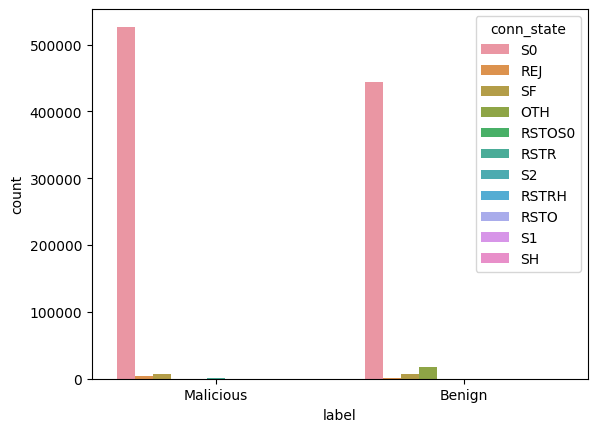

In [9]:
sns.countplot(data=df, x='label', hue='conn_state')

<Axes: xlabel='label', ylabel='count'>

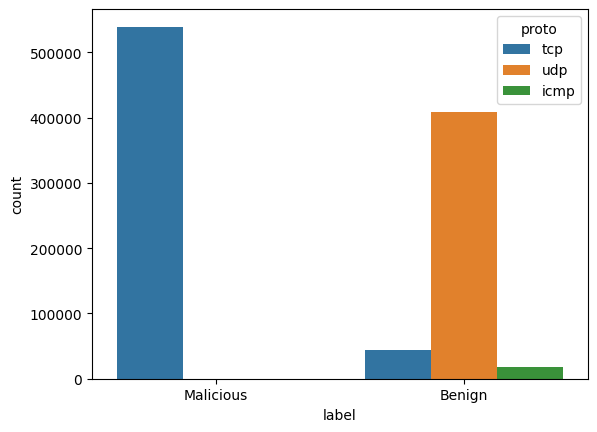

In [10]:
sns.countplot(data=df, x='label', hue='proto')

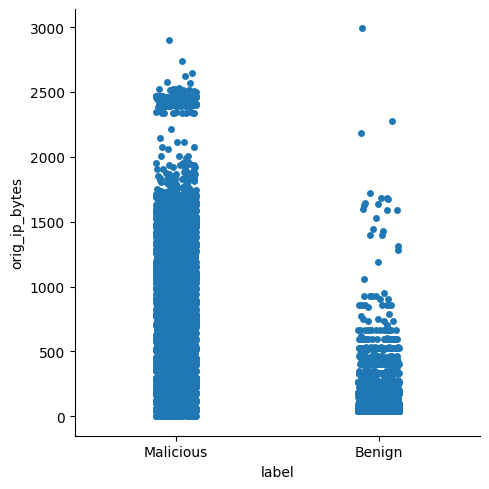

In [11]:
sns.catplot(data=df, x='label', y='orig_ip_bytes')

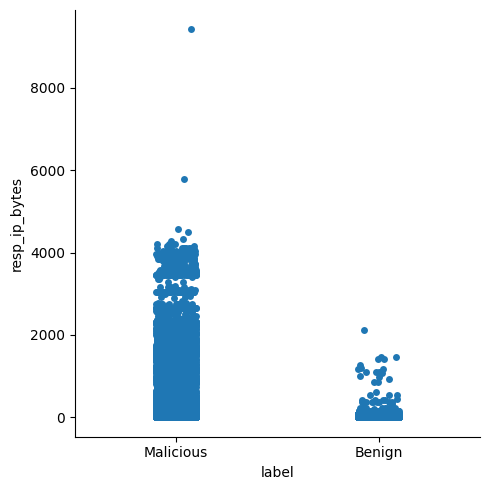

In [12]:
sns.catplot(data=df, x='label', y='resp_ip_bytes')

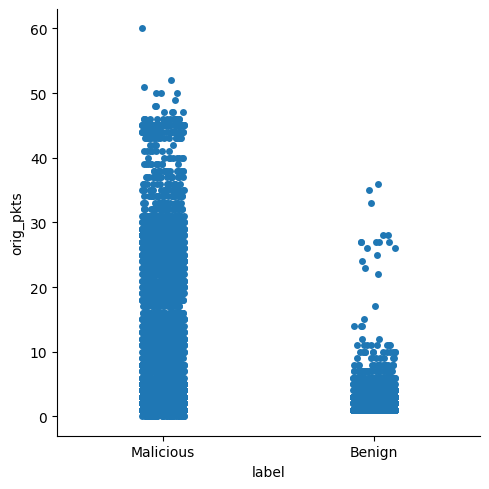

In [13]:
sns.catplot(data=df, x='label', y='orig_pkts')

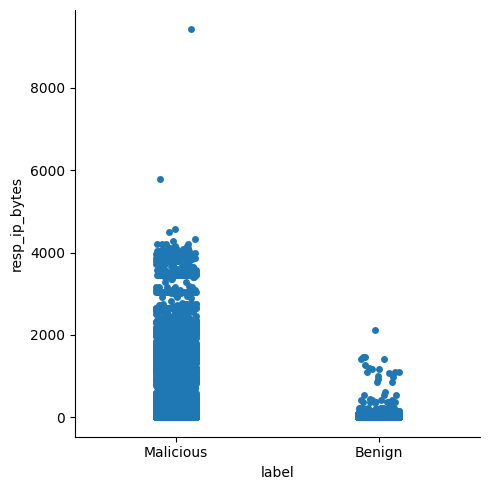

In [14]:
sns.catplot(data=df, x='label', y='resp_ip_bytes')

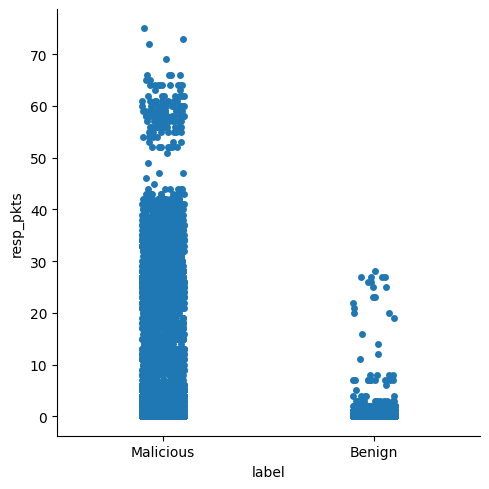

In [15]:
sns.catplot(data=df, x='label', y='resp_pkts')

Model

In [16]:
df = df[['proto', 'history', 'resp_ip_bytes', 'orig_pkts', 'resp_pkts', 'orig_ip_bytes', 'id.resp_p', 'label']]

In [17]:
# remove duplicate rows
df = df.drop_duplicates()
df.shape

(105639, 8)

In [18]:
df.nunique()

proto                3
history            126
resp_ip_bytes     1141
orig_pkts           54
resp_pkts           69
orig_ip_bytes     1249
id.resp_p        75844
label                2
dtype: int64

In [19]:
# perform label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['proto'] = le.fit_transform(df['proto'])
df['history'] = le.fit_transform(df['history'])
df['label'] = le.fit_transform(df['label'])
df.head()

,proto,history,resp_ip_bytes,orig_pkts,resp_pkts,orig_ip_bytes,id.resp_p,label
0,1,22,0.0,3.0,0.0,180.0,23,1
1,1,22,0.0,1.0,0.0,60.0,23,1
6,1,22,0.0,3.0,0.0,180.0,49560,0
7,1,22,0.0,1.0,0.0,60.0,21288,0
9,1,22,0.0,1.0,0.0,60.0,8080,1


In [20]:
df.dtypes

proto              int64
history            int64
resp_ip_bytes    float64
orig_pkts        float64
resp_pkts        float64
orig_ip_bytes    float64
id.resp_p         object
label              int64
dtype: object

Trained an SVM Model, and performed hyperparameter tuning to improve the performance of the model.

In [27]:
# train model user 'label' as target with use of SVM
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.svm import SVC

model = SVC(C=0.5)
model.fit(X_train, y_train)

# evaluate model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


[[20451     0]
 [  118   559]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20451
           1       1.00      0.83      0.90       677

    accuracy                           0.99     21128
   macro avg       1.00      0.91      0.95     21128
weighted avg       0.99      0.99      0.99     21128



In [28]:
# train model user 'label' as target with use of SVM
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.svm import SVC

model = SVC(C=0.3)
model.fit(X_train, y_train)

# evaluate model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[20481     0]
 [   98   549]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20481
           1       1.00      0.85      0.92       647

    accuracy                           1.00     21128
   macro avg       1.00      0.92      0.96     21128
weighted avg       1.00      1.00      1.00     21128



In [29]:
# train model user 'label' as target with use of SVM
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

# evaluate model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[20444     0]
 [  103   581]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20444
           1       1.00      0.85      0.92       684

    accuracy                           1.00     21128
   macro avg       1.00      0.92      0.96     21128
weighted avg       1.00      1.00      0.99     21128



Trained a KNN Model and obtained a better recall than the SVM Model.

In [26]:
# now train a model using knn
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

# evaluate model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20456     2]
 [    7   663]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20458
           1       1.00      0.99      0.99       670

    accuracy                           1.00     21128
   macro avg       1.00      0.99      1.00     21128
weighted avg       1.00      1.00      1.00     21128



SVM gives more false negative, hence it is a problem for our dataset. KNN gives less false negative which is better.

Because our positive label is Malicious data.